In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train.dtypes[train.dtypes!='object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.isnull().sum()  

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

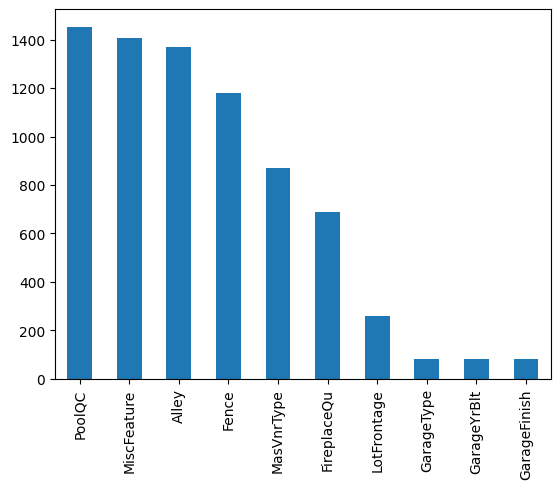

In [9]:
missing=train.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True, ascending=False)
missing_value_feat=missing.head(10)
plt.figure
missing_value_feat.plot.bar()

C:\Users\SUYOG\AppData\Local\Temp\ipykernel_7596\1905885244.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], kde=True, bins=20)


<Axes: xlabel='SalePrice', ylabel='Density'>

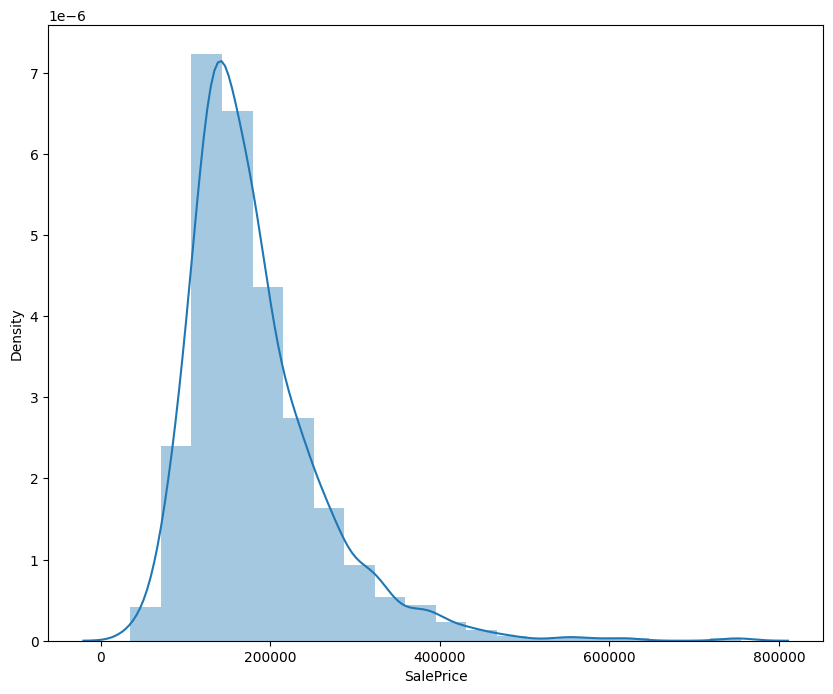

In [10]:
plt.figure(figsize=(10,8))
sns.distplot(train['SalePrice'], kde=True, bins=20)


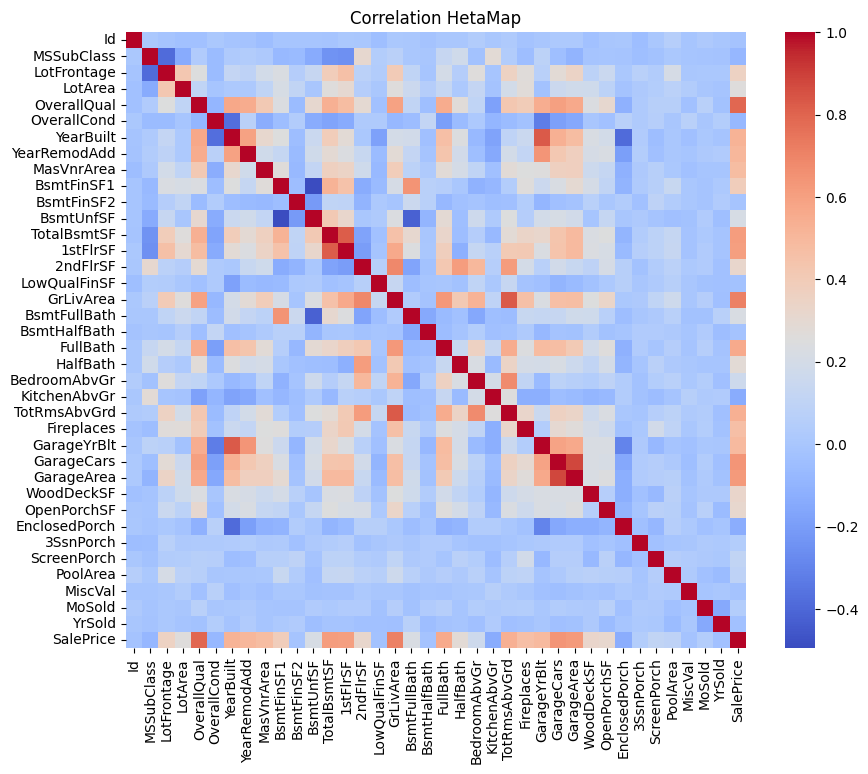

In [11]:
corr_matrix=train.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title("Correlation HetaMap")
plt.show()

In [12]:
corr_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [13]:
train['Alley']=train['Alley'].fillna('None')
train['MasVnrType']=train['MasVnrType'].fillna('None')
train['MasVnrArea']=train['MasVnrArea'].fillna(0)
train['LotFrontage']=train['LotFrontage'].fillna(0)
train['BsmtQual']=train['BsmtQual'].fillna('None')
train['BsmtCond']=train['BsmtCond'].fillna('None')
train['BsmtExposure']=train['BsmtExposure'].fillna('None')
train['BsmtFinType1']=train['BsmtFinType1'].fillna('None')
train['BsmtFinType2']=train['BsmtFinType2'].fillna('None')
train['FireplaceQu']=train['FireplaceQu'].fillna('None')
train['GarageType']=train['GarageType'].fillna('None')
train['GarageFinish']=train['GarageFinish'].fillna('None')
train['GarageQual']=train['GarageQual'].fillna('None')
train['GarageCond']=train['GarageCond'].fillna('None')
train['PoolQC']=train['PoolQC'].fillna('None')
train['Fence']=train['Fence'].fillna('None')
train['MiscFeature']=train['MiscFeature'].fillna('None')
train['Electrical']=train['Electrical'].fillna(train['Electrical'].mode()[0])
train.drop('GarageYrBlt',axis=1, inplace=True)
train.drop('Id',axis=1, inplace=True)



In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [16]:
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['LotFrontage']=test['LotFrontage'].fillna(0)
test['Alley']=test['Alley'].fillna('None')
test['Utilities']=test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st']=test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['MasVnrType']=test['MasVnrType'].fillna('None')
test['MasVnrArea']=test['MasVnrArea'].fillna(0)
test['BsmtQual']=test['BsmtQual'].fillna('None')
test['BsmtCond']=test['BsmtCond'].fillna('None')
test['BsmtExposure']=test['BsmtExposure'].fillna('None')
test['BsmtFinType1']=test['BsmtFinType1'].fillna('None')
test['BsmtFinType2']=test['BsmtFinType2'].fillna('None')
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(0)
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(0)
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(0)
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(0)
test['BsmtFullBath']=test['BsmtFullBath'].fillna(0)
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(0)
test['Functional']=test['Functional'].fillna(test['Functional'].mode()[0])
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['FireplaceQu']=test['FireplaceQu'].fillna('None')
test['GarageType']=test['GarageType'].fillna('None')
test['GarageFinish']=test['GarageFinish'].fillna('None')
test['GarageQual']=test['GarageQual'].fillna('None')
test['GarageCond']=test['GarageCond'].fillna('None')
test['GarageCars']=test['GarageCars'].fillna(0)
test['GarageArea']=test['GarageArea'].fillna(0)
test['PoolQC']=test['PoolQC'].fillna('None')
test['Fence']=test['Fence'].fillna('None')
test['MiscFeature']=test['MiscFeature'].fillna('None')
test['SaleType']=test['SaleType'].fillna(test['KitchenQual'].mode()[0])
test.drop('GarageYrBlt',axis=1, inplace=True)
test.drop('Id',axis=1, inplace=True)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [18]:
train['MSSubClass']=train['MSSubClass'].astype('category')
test['MSSubClass']=test['MSSubClass'].astype('category')
train['YearBuilt']=pd.to_datetime(train['YearBuilt'], format='%Y')
test['YearBuilt']=pd.to_datetime(test['YearBuilt'], format='%Y')
train['OverallCond']=train['OverallCond'].astype('category')
test['OverallQual']=test['OverallQual'].astype('category')
train['YrSold']=pd.to_datetime(train['YrSold'], format='%Y')
test['YrSold']=pd.to_datetime(test['YrSold'], format='%Y')
train['MoSold']=pd.to_datetime(train['MoSold'], format='%M')
test['MoSold']=pd.to_datetime(test['MoSold'], format='%M')

In [19]:
categ_col=train.select_dtypes(include=['category', object, 'datetime']).columns.tolist()

In [20]:
num_col=train.select_dtypes(include='number').columns.tolist()
num_col.remove('SalePrice')

In [21]:
categ_pipeline=Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [22]:
num_pipeline=Pipeline([
    ('scaler', StandardScaler()),
])

In [23]:
processor=ColumnTransformer([
    ('num', num_pipeline, num_col),
    ('categ', categ_pipeline, categ_col)
])

In [24]:
lr_model=Pipeline([
    ('processing', processor),
    ('model', LinearRegression())
])

In [25]:
X_train=train.drop('SalePrice', axis=1)
y_train=train['SalePrice']

In [26]:
lr_scores=cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [27]:
print('MSE fro lr_model:', -lr_scores.mean())

MSE fro lr_model: 1452845786.7756882


In [28]:
rg_model=Pipeline([
    ('processing', processor),
    ('model', Ridge())
])

In [29]:
rg_scores=cross_val_score(rg_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [30]:
print('MSE for rg_model:',-rg_scores.mean())

MSE for rg_model: 1190876451.8716578


In [31]:
lasso_model=Pipeline([
    ('processing', processor),
    ('model', Lasso())
])

In [32]:
rf_model=Pipeline([
    ('processing', processor),
    ('model', RandomForestRegressor())
])

In [33]:
cb_model=Pipeline([
    ('processing', processor),
    ('model', CatBoostRegressor())
])

In [34]:
xgbr_model=Pipeline([
    ('processing', processor),
    ('model', XGBRegressor())
])

In [35]:
lasso_scores=cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rf_scores=cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cb_scores=cross_val_score(cb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
xgbr_scores=cross_val_score(xgbr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

c:\Users\SUYOG\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94371295298.64398, tolerance: 759214014.2531197
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\SUYOG\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50331228153.85199, tolerance: 728773513.025937
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\SUYOG\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67253203588.290955, tolerance: 699031751.5199751
  model = cd_fast.sparse_enet_coordinate_descent

Learning rate set to 0.04196
0:	learn: 78497.3670185	total: 130ms	remaining: 2m 9s
1:	learn: 76446.9797724	total: 138ms	remaining: 1m 8s
2:	learn: 74489.6637056	total: 146ms	remaining: 48.4s
3:	learn: 72649.5953367	total: 153ms	remaining: 38.1s
4:	learn: 70654.9541694	total: 160ms	remaining: 31.8s
5:	learn: 68905.4916802	total: 167ms	remaining: 27.6s
6:	learn: 67344.4738818	total: 172ms	remaining: 24.4s
7:	learn: 65805.4056783	total: 177ms	remaining: 22s
8:	learn: 64137.5576822	total: 182ms	remaining: 20.1s
9:	learn: 62626.1894335	total: 187ms	remaining: 18.5s
10:	learn: 61149.4385376	total: 191ms	remaining: 17.2s
11:	learn: 59861.7982706	total: 195ms	remaining: 16.1s
12:	learn: 58607.5961430	total: 199ms	remaining: 15.1s
13:	learn: 57275.8078030	total: 202ms	remaining: 14.3s
14:	learn: 55999.4004301	total: 206ms	remaining: 13.6s
15:	learn: 54742.0534936	total: 210ms	remaining: 12.9s
16:	learn: 53657.7486800	total: 214ms	remaining: 12.4s
17:	learn: 52556.5624310	total: 217ms	remaining:

In [36]:
print('MSE for lasso_model:',-lasso_scores.mean())
print('MSE for rf_model:',-rf_scores.mean())
print('MSE for cb_model:',-cb_scores.mean())
print('MSE for xgbr_model:',-xgbr_scores.mean())

MSE for lasso_model: 1372237559.892245
MSE for rf_model: 920603813.0046688
MSE for cb_model: 725699433.1874644
MSE for xgbr_model: 860810931.2


In [37]:
cb_model.fit(X_train, y_train)

Learning rate set to 0.043466
0:	learn: 77231.8804057	total: 3.26ms	remaining: 3.25s
1:	learn: 75237.6901976	total: 5.91ms	remaining: 2.95s
2:	learn: 73232.6113351	total: 9.14ms	remaining: 3.04s
3:	learn: 71274.9987189	total: 12.1ms	remaining: 3.02s
4:	learn: 69249.6049060	total: 15.6ms	remaining: 3.11s
5:	learn: 67430.7655630	total: 18.3ms	remaining: 3.02s
6:	learn: 65781.2183706	total: 21.5ms	remaining: 3.05s
7:	learn: 64189.1986720	total: 24.2ms	remaining: 3s
8:	learn: 62529.0297547	total: 27.5ms	remaining: 3.03s
9:	learn: 61072.5969910	total: 30.3ms	remaining: 3s
10:	learn: 59600.9199818	total: 33.5ms	remaining: 3.01s
11:	learn: 58127.4753868	total: 36.6ms	remaining: 3.01s
12:	learn: 56811.7633095	total: 39.7ms	remaining: 3.01s
13:	learn: 55477.4330523	total: 42.9ms	remaining: 3.02s
14:	learn: 54174.4194563	total: 45.9ms	remaining: 3.02s
15:	learn: 53045.5183804	total: 49.2ms	remaining: 3.02s
16:	learn: 51837.2810383	total: 52.3ms	remaining: 3.02s
17:	learn: 50811.0716111	total: 55

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'OverallQual',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',...
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallCond', 'YearBuilt',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating', ...])])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x0000015E7A3BABA0>)])

In [38]:
y_pred=cb_model.predict(test)

In [39]:
y_pred

array([127840.04899679, 164418.35399385, 189858.41413912, ...,
       160600.83782047, 120143.79971792, 233046.16612724])

In [40]:
y_pred=np.round(y_pred, 1)
predictions=pd.DataFrame({'Id':range(1461, 1461+len(y_pred)) , 'SalePrice':y_pred})
predictions
predictions.to_csv('Submission-3.csv', index=False)